# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Daffa Muhamad Azhar
- Email: rar.azhar.416@gmail.com
- Id Dicoding: daffa_azhar416

## Menentukan Pertanyaan Bisnis

- Bagaimana perkembangan jumlah peminjam pada tahun 2011 hingga 2012?
- Apa saja yang hal yang dapat memengaruhi jumlah peminjam pada tahun 2011 hingga 2012?

## Menyaipkan semua library yang dibuthkan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
root = '/content/drive/MyDrive/Colab Notebooks/Dicoding/'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import sys

## Data Wrangling

### Gathering Data

Sumber Dataset : [Bike Sharing Dataset](https://drive.google.com/file/d/1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ/view)

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [ ]:
dataset = root + 'Dataset/Bike Sharing/'
df = pd.read_csv(dataset + 'day.csv')

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Melakukan rename kolom untuk mempermudah dalam memahami data

In [ ]:
# rename kolom
df = df.rename(columns={'instant':'id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'yr':'year'
                        }
               )

In [ ]:
df.head(10)

,id,datetime,season,year,month,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


### Assessing Data

Melakukan pengecekan missing value

In [ ]:
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_2], axis=1, keys=['Total Missing', '%'])
print(missing_data)

                   Total Missing    %
id                             0  0.0
datetime                       0  0.0
season                         0  0.0
year                           0  0.0
month                          0  0.0
is_holiday                     0  0.0
weekday                        0  0.0
is_workingday                  0  0.0
weather_condition              0  0.0
temp                           0  0.0
atemp                          0  0.0
humidity                       0  0.0
windspeed                      0  0.0
casual                         0  0.0
registered                     0  0.0
total_count                    0  0.0


Cek data duplikast pada dataset

In [ ]:
df.duplicated().sum()

0

Cek anomali dan outlier pada dataset

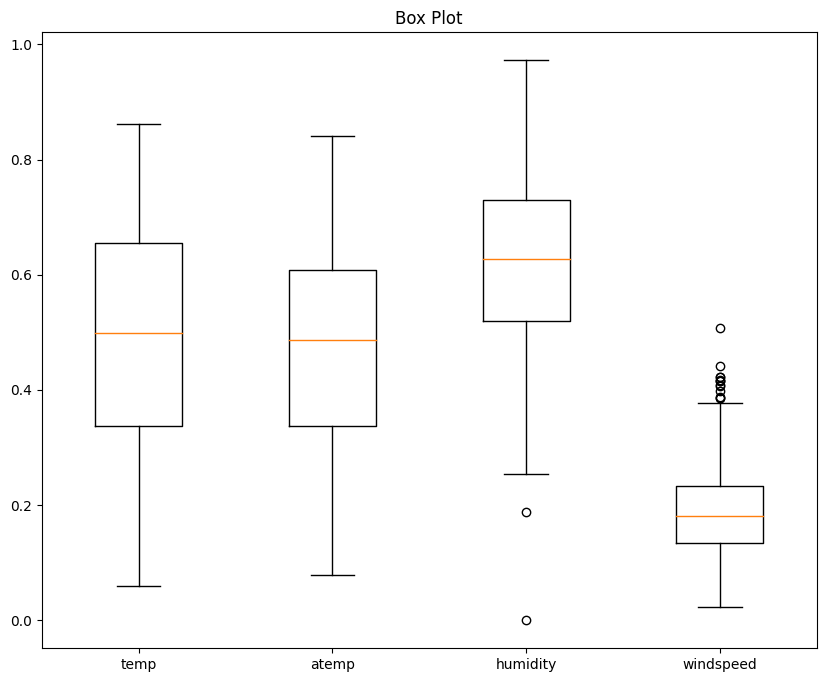

In [ ]:
plt.figure(figsize=(10,8))
plt.boxplot([df['temp'], df['atemp'], df['humidity'], df['windspeed'],])
plt.xticks([1,2,3,4], ['temp', 'atemp', 'humidity', 'windspeed'])
plt.title('Box Plot')
plt.show()

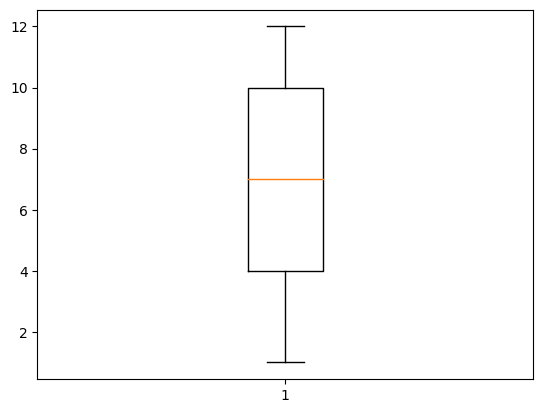

In [ ]:
plt.boxplot(df['month'])
plt.show()

In [ ]:
df[(df['season'] != 1) & (df['season'] != 2) & (df['season'] != 3) & (df['season'] != 4)].count()

id                   0
datetime             0
season               0
year                 0
month                0
is_holiday           0
weekday              0
is_workingday        0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

In [ ]:
df[(df['weather_condition'] != 1) & (df['weather_condition'] != 2) & (df['weather_condition'] != 3) & (df['weather_condition'] != 4)].count()

id                   0
datetime             0
season               0
year                 0
month                0
is_holiday           0
weekday              0
is_workingday        0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

In [ ]:
df[df['registered'] > df['total_count']].count()

id                   0
datetime             0
season               0
year                 0
month                0
is_holiday           0
weekday              0
is_workingday        0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

Tidak ada outlier yang perlu di drop atau diperbaiki pada dataset

### Cleaning Data

Melakukan konversi tipe data

In [ ]:
#date time conversion
df['datetime']=pd.to_datetime(df.datetime)

# Categorical variables
df['season']=df.season.astype('category')
df['is_holiday']=df.is_holiday.astype('category')
df['is_workingday']=df.is_workingday.astype('category')
df['weekday']=df.weekday.astype('category')
df['weather_condition']=df.weather_condition.astype('category')
df['month']=df.month.astype('category')
df['year']=df.year.astype('category')

Melakukan drop ID karena tidak dibutuhkan

In [ ]:
df = df.drop('id', axis=1)

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,total_count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   datetime           731 non-null    datetime64[ns]
 1   season             731 non-null    category      
 2   year               731 non-null    category      
 3   month              731 non-null    category      
 4   is_holiday         731 non-null    category      
 5   weekday            731 non-null    category      
 6   is_workingday      731 non-null    category      
 7   weather_condition  731 non-null    category      
 8   temp               731 non-null    float64       
 9   atemp              731 non-null    float64       
 10  humidity           731 non-null    float64       
 11  windspeed          731 non-null    float64       
 12  casual             731 non-null    int64         
 13  registered         731 non-null    int64         
 14  total_coun

Melihat jumlah peminjam pada setiap bulan

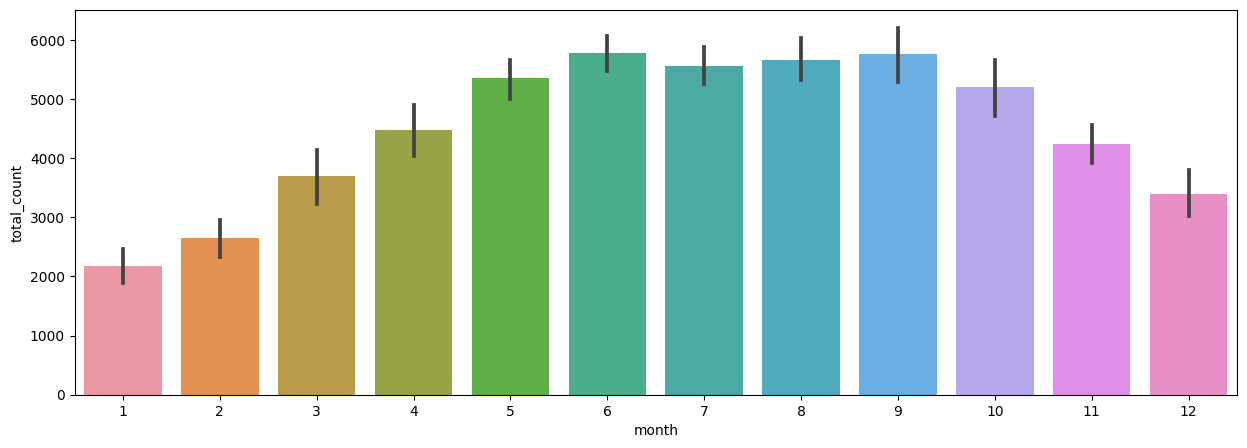

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15,5))

sns.barplot(x="month", y='total_count', data=df, ax=ax)
ax.title.set_text('')

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perkembangan jumlah peminjam pada tahun 2011 hingga 2012?

Membuat grafik untuk melihat perubahan jumlah peminjam (user) setiap harinya

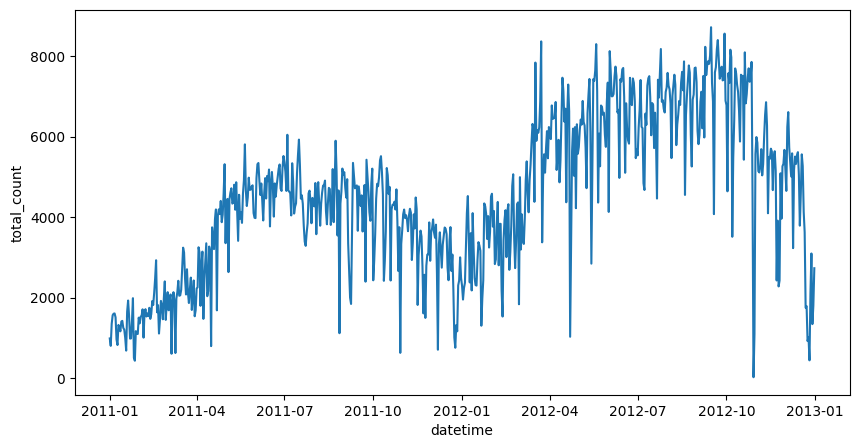

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (10,5))

sns.lineplot(x="datetime", y='total_count', data=df, ax=ax)
ax.title.set_text('')

In [ ]:
df_monthly = df[['id', 'datetime', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'total_count']]

df_monthly = df.groupby(pd.Grouper(key='datetime', freq='M')).agg({'temp': 'mean', 'atemp': 'mean', 'humidity': 'mean', 'windspeed': 'mean', 'casual': 'sum', 'registered': 'sum', 'total_count': 'sum'}).reset_index()

In [ ]:
df_monthly.head()

,datetime,temp,atemp,humidity,windspeed,casual,registered,total_count
0,2011-01-31,0.197707,0.204490,0.584366,0.195419,3073,35116,38189
1,2011-02-28,0.282540,0.284412,0.560093,0.228568,6242,41973,48215
2,2011-03-31,0.331667,0.325299,0.569414,0.232408,12826,51219,64045
3,2011-04-30,0.471188,0.456775,0.668287,0.244216,22346,72524,94870
4,2011-05-31,0.577231,0.550814,0.713360,0.181274,31050,104771,135821


Membuat grafik jumlah peminjam untuk setiap bulannya dari januari 2011 hingga desember 2012

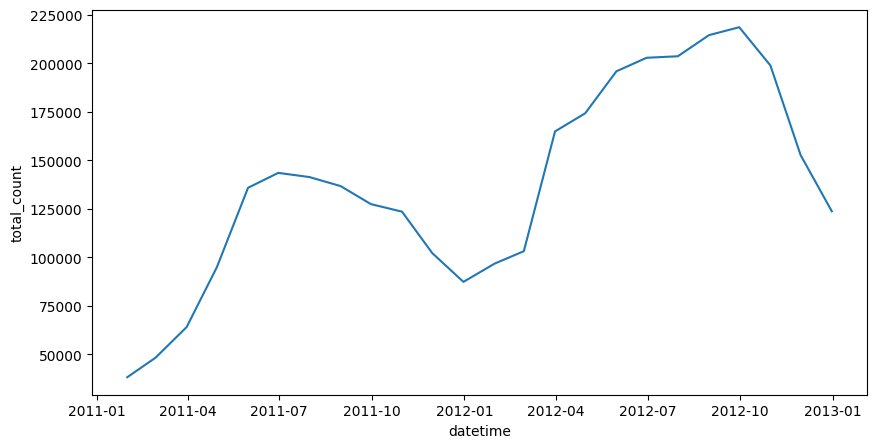

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (10,5))

sns.lineplot(x="datetime", y='total_count', data=df_monthly, ax=ax)
ax.title.set_text('')

### Pertanyaan 2: 

Melihat pengaruh data kategorikal terhadap jumlah peminjam

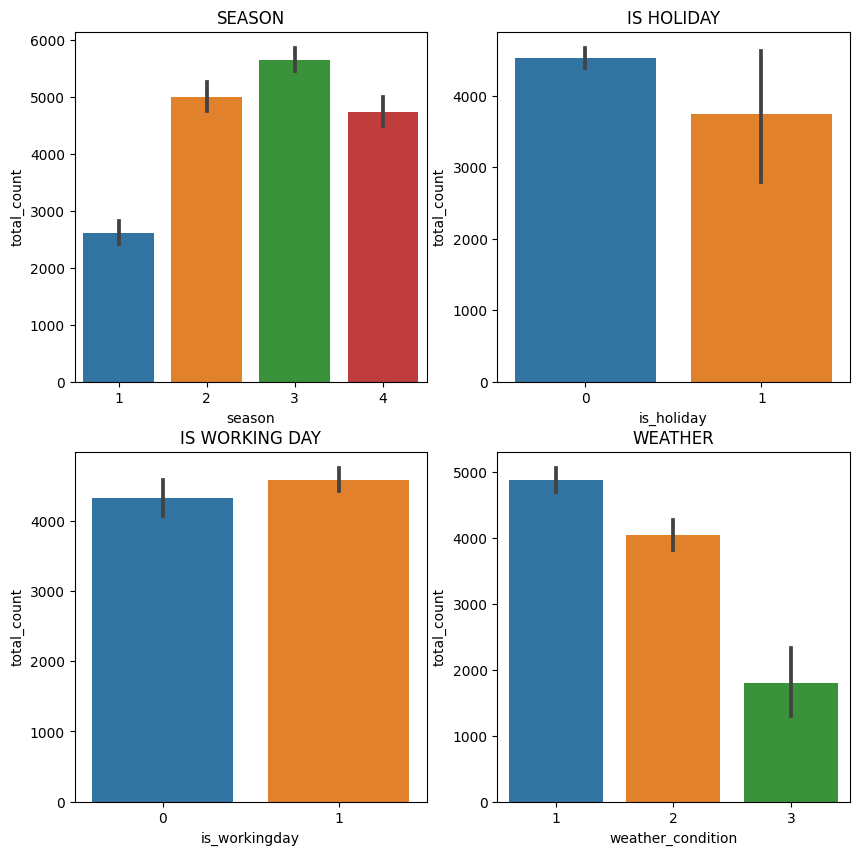

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (10,10))

sns.barplot(x="season", y='total_count', data=df, ax=ax[0,0])
ax[0,0].title.set_text('SEASON')
sns.barplot(x="is_holiday", y='total_count', data=df, ax=ax[0,1])
ax[0,1].title.set_text('IS HOLIDAY')
sns.barplot(x="is_workingday", y='total_count', data=df, ax=ax[1,0])
ax[1,0].title.set_text('IS WORKING DAY')
sns.barplot(x="weather_condition", y='total_count', data=df, ax=ax[1,1])
ax[1,1].title.set_text('WEATHER')

Melihat korelasi dari data numerikal terhadap jumlah peminjam

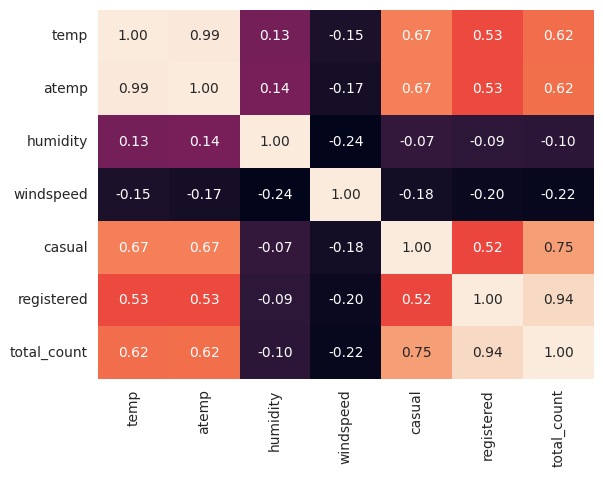

In [ ]:
with sns.axes_style("white"):
  sns.heatmap(df.corr(method='spearman'), vmax=1, fmt=".2f", annot=True, cbar=False);

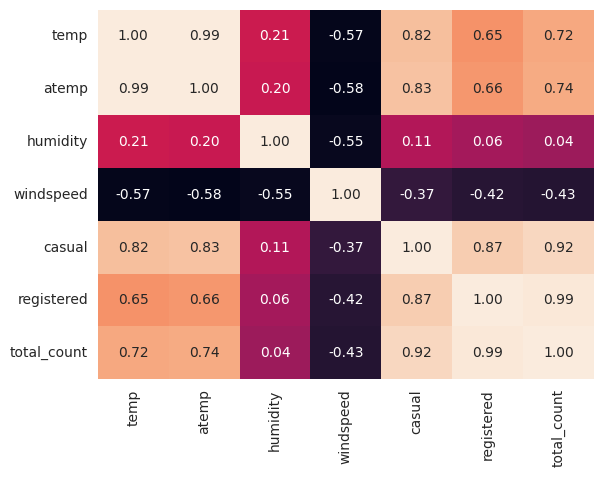

In [ ]:
with sns.axes_style("white"):
  sns.heatmap(df_monthly.corr(method='spearman'), vmax=1, fmt=".2f", annot=True, cbar=False);

## Conclusion

- Berdasarkan visualisasi data, perkembangan jumlah peminjam mengalami kenaikan juga penurunan. Setiap awal tahun selalu mengalami kenaikan dari sebelumnya tetapi ketika mendekati akhir tahun jumlah peminjam kembali menurun.

- Berdasarkan visualisasi data, jumlah peminjam terbanyak yaitu pada musin gugur, cuaca cerah maupun berawan, hari kerja dan bukan hari liburan. Berdasarkan korelasi, temperatur udara memengaruhi jumlah peminjam sedangkan kelembaban serta angin tidak memengaruhi jumlah peminjam.

In [ ]:
df.to_csv("df.csv", index=False)

In [ ]:
df_monthly.to_csv("df_monthly.csv", index=False)